In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
cancer =load_breast_cancer()
print(f"Cancer.keys(): {cancer.keys()}")


Cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [2]:
print("Sample Counts per class:\n{}".format({n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))


Sample Counts per class:
{'malignant': 212, 'benign': 357}


In [3]:
print(f"Feature names:\n{cancer.feature_names}")

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
print(f"Description:\n{cancer.DESCR}")

Description:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Ra

In [5]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

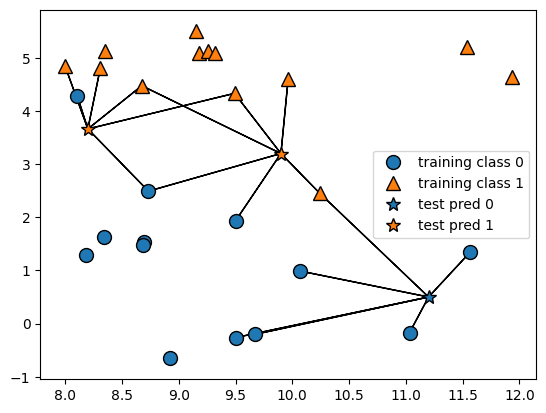

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=6)

In [7]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [8]:
from sklearn.neighbors import KNeighborsClassifier 
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print(f"Test set Prediction: {clf.predict(X_test)}")

Test set Prediction: [1 0 1 0 1 0 0]


In [9]:
print(f"Test set accuracy: {clf.score(X_test, y_test):.2f}")

Test set accuracy: 0.86


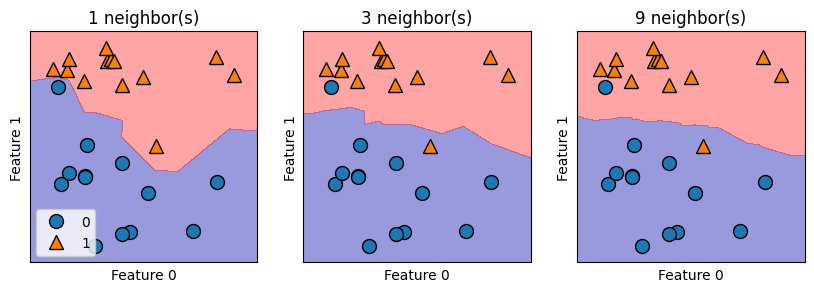

In [10]:
import matplotlib as plt
fig, axes = plt.pyplot.subplots(1,3,figsize=(10,3))
for n_neighbors, ax in zip([1,3,9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax)
    ax.set_title(f"{n_neighbors} neighbor(s)")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc=3)